In [1]:
import numpy as onp
import jax.numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import corner
import pandas as pd

import pzflow
from pzflow import Flow
from pzflow.bijectors import Chain, ColorTransform, InvSoftplus, StandardScaler, RollingSplineCoupling
from pzflow.distributions import Joint, Normal, Uniform

In [3]:
flow = Flow(file="saved-flows/desc-dc2-conditional-flow.pkl")

In [14]:
data = pd.read_pickle("dc2.pkl")
# create training and test sets
trainset = data.sample(frac = 0.8, random_state = 0).sort_index()
testset = data.drop(trainset.index)
del data
testset

,redshift,u,g,r,i,z,y,ra,dec,size,ellipticity
1,1.669109,27.594755,27.341902,26.978935,26.064869,25.297333,24.829222,63.595239,-42.737808,0.157922,0.103562
4,0.495375,27.616890,26.316532,25.005684,24.470062,24.259823,24.124353,60.895633,-37.089175,0.136636,0.690425
15,1.056485,25.385611,25.503485,25.573498,25.435183,25.087915,25.103123,69.144625,-42.313397,0.094803,0.084845
22,1.040392,25.314253,25.281454,24.923721,24.411406,23.816133,23.748724,67.104413,-41.665734,0.272997,0.119475
26,0.198942,26.865801,25.617020,25.010592,24.790861,24.653709,24.581953,64.519713,-38.024052,0.165025,0.186828
...,...,...,...,...,...,...,...,...,...,...,...
999977,0.841297,23.615894,23.584246,23.278494,22.536390,22.268894,22.204895,63.912081,-37.143424,0.375155,0.188988
999983,0.653381,27.548754,26.828299,25.755365,25.020004,24.858578,24.743952,65.117640,-38.640214,0.113900,0.016409
999984,1.160632,26.952429,26.645180,25.614807,24.730795,23.914375,23.403753,61.990031,-36.469595,0.561566,0.010779
999986,1.073495,26.472219,26.396893,26.059200,25.627024,24.952419,24.868227,66.628510,-38.970924,0.119432,0.150308


In [23]:
samples = flow.sample(1, conditions=flow.info["condition_scaler"](testset), seed=0)
#samples[list(samples.columns[4:])] = testset[list(samples.columns[4:])]

In [27]:
samples[list(samples.columns[4:])]

,redshift,u,g,r,i,z,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.669109,27.594755,27.341902,26.978935,26.064869,25.297333,24.829222
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.495375,27.616890,26.316532,25.005684,24.470062,24.259823,24.124353
...,...,...,...,...,...,...,...
199995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
testset[list(samples.columns[4:])]

,redshift,u,g,r,i,z,y
1,1.669109,27.594755,27.341902,26.978935,26.064869,25.297333,24.829222
4,0.495375,27.616890,26.316532,25.005684,24.470062,24.259823,24.124353
15,1.056485,25.385611,25.503485,25.573498,25.435183,25.087915,25.103123
22,1.040392,25.314253,25.281454,24.923721,24.411406,23.816133,23.748724
26,0.198942,26.865801,25.617020,25.010592,24.790861,24.653709,24.581953
...,...,...,...,...,...,...,...
999977,0.841297,23.615894,23.584246,23.278494,22.536390,22.268894,22.204895
999983,0.653381,27.548754,26.828299,25.755365,25.020004,24.858578,24.743952
999984,1.160632,26.952429,26.645180,25.614807,24.730795,23.914375,23.403753
999986,1.073495,26.472219,26.396893,26.059200,25.627024,24.952419,24.868227


(0.9599310885968813, 1.3089969389957472)

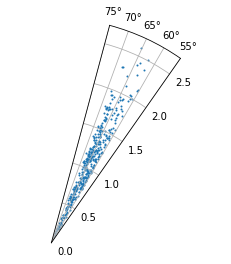

In [47]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
idx = np.where((samples["dec"] > -40) & (samples["dec"] < -39.9))
ax.scatter(samples["ra"].iloc[idx]*np.pi/180, samples["redshift"].iloc[idx], s=1)
ax.set_xlim(55*np.pi/180, 75*np.pi/180)

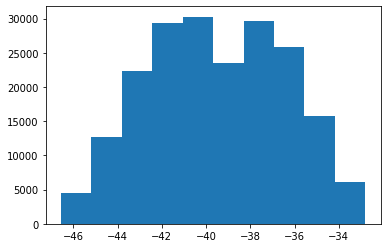

In [41]:
plt.hist(samples["dec"])
idx = np.where((samples["dec"] > -40) & (samples["dec"] < -38))